<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 (Assignment) -- Drug Discovery </h2>

# Exercise 0

- Import the same modules as discussed in the lecture notebook.
- Check if your model versions are correct.

In [1]:
import u4_utils as u4
import rdkit
import pandas as pd
import numpy as np
import sys
import scipy
import scipy.sparse as sp
import sklearn
import matplotlib
import matplotlib.pyplot as plt

from rdkit import Chem # Chem as package
from rdkit.Chem import AllChem, Draw
from functools import partial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from distutils.version import LooseVersion


RDKit WARNING: [16:17:11] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
u4.check_module_versions()
# I have updated the versions but it isn't shown here.


Installed Python version: 3.7 (✓)
Installed numpy version: 1.16.2 (✗)
Installed pandas version: 0.24.2 (✗)
Installed scikit-learn version: 0.20.3 (✗)
Installed scipy version: 1.2.1 (✗)
Installed matplotlib version: 3.0.3 (✓)
Installed rdkit version: 2019.09.3 (✓)


# Exercise 1

We are looking at the lowest unoccupied molecular orbital energy (LUMO). You can access the values by <code>GetProp('LUMO')</code>. 

- Print <i>name</i> and <i>LUMO value</i> of the first $10$ molecules
- Which of (all) molecules has the <i>highest</i> LUMO value? Write a short piece of code to figure this out.

NOTA BENE: If you access  <code>GetProp('LUMO')</code> a string is returned. You might want to convert this string to a float value for the second task (<code>float()</code>).

In [2]:
# Load Dataset
suppl = Chem.SDMolSupplier('resources/molecules.sdf')


In [117]:
molecule = suppl[0]
formula = list()
for molecule in suppl:
    formula.append(f'{molecule.GetProp("Compound Name")}; {float(molecule.GetProp("LUMO"))}')

formula[0:10]       


['2-nitrophenanthrene; -1.246',
 '8-nitroquinoline; -1.429',
 '5-nitroquinoline; -1.456',
 '1-nitrofluoranthene; -1.591',
 '2,5-difluoronitrobenzene; -1.59',
 '1,3,6,8-tetranitropyrene; -3.406',
 '3-methyl-4-nitrobiphenyl; -1.144',
 '2-acetoxy-7-nitrofluorene; -1.437',
 '2-methyl-7-nitrofluorene; -1.387',
 '9-nitrophenanthrene; -1.254']

In [4]:
formula2 = list()
for molecule2 in suppl:
    formula2.append(float(molecule2.GetProp("LUMO")))

lumo_max = max(formula2)
index_lumo_max = formula2.index(lumo_max)
formula[index_lumo_max]


'2-nitro-m-phenylenediamine; -0.529'

# Exercise 2

- Find the molecule in <i>suppl</i> with the <i>highest</i> and the molecule with the <i>lowest</i> number of bonds and print their respective names.
- Draw the molecule with the <i>highest</i> number of bonds both <i>with</i> and <i>without</i> atoms numbered.
- For the molecule with the <i>highest</i> number of bonds, print the atoms (<code> GetIdx() </code>, <code> GetSymbol() </code>), their masses and check if they are in the ring. Compare the results with the drawing.

In [5]:
bond_numbers = []
for molecule3 in suppl:
    a= molecule3.GetNumBonds()
    bond_numbers.append(a)
min_bond = min(bond_numbers)
max_bond = max(bond_numbers)

bond_names = list()
for molecule4 in suppl:
    bond_names.append(molecule4.GetProp("Compound Name"))

index_min_bond = bond_numbers.index(min_bond)
index_max_bond = bond_numbers.index(max_bond)
min_name = bond_names[index_min_bond]
max_name = bond_names[index_max_bond]

string_min = min_name + ' is the molecule with the lowest number of bonds'
string_min

# other way to get the name:
# min2 = suppl[index_min_bond]
# min_name2 = min2.GetProp('Compound Name')
# min_name2


'nitrobenzene is the molecule with the lowest number of bonds'

In [6]:
max_name
string_max = max_name + ' is the molecule with the highest number of bonds'
string_max


'1-nitrocoronene is the molecule with the highest number of bonds'

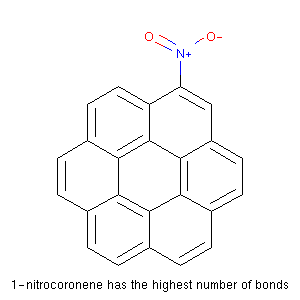

In [7]:
in_data = suppl[index_max_bond]
leg = str(max_name) + ' has the highest number of bonds'
Draw.MolToImage(in_data, legend = leg)


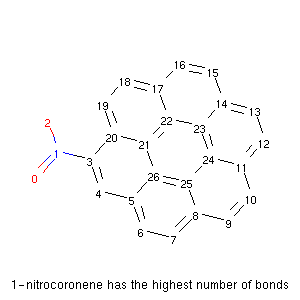

In [8]:
m = suppl[index_max_bond]
m_smiles = Chem.MolToSmiles(m)
from_smile_to_mol = Chem.MolFromSmiles(m_smiles)
Draw.MolToImage(from_smile_to_mol, includeAtomNumbers=True, legend = leg)


In [9]:
print('Atom information about the molecule with the highest number of bonds:\n')

for atom in from_smile_to_mol.GetAtoms(): # loop of all atoms in the molecules
    print('Index: ', atom.GetIdx(), '\tSymbol:', atom.GetSymbol(), '\tMass: ', atom.GetMass(),
          '\tIn ring:', atom.IsInRing())
    

Atom information about the molecule with the highest number of bonds:

Index:  0 	Symbol: O 	Mass:  15.999 	In ring: False
Index:  1 	Symbol: N 	Mass:  14.007 	In ring: False
Index:  2 	Symbol: O 	Mass:  15.999 	In ring: False
Index:  3 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  4 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  5 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  6 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  7 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  8 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  9 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  10 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  11 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  12 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  13 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  14 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  15 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  16 	Symbol: C 	Mass:  12.011 	In ring: True
Index:  17 	Symbol: C 	Mass:  12.011 	In ring: True


The table shows that the atoms with the indeces 0; 1; 2 aren't in the ring. The drawing with numbered atoms agrees with that. 
Furthermore, the table shows that the remaining atoms are all in the ring. Also here, the drawings approve this statement. However, in the drawings you can't see all the involved atom names what is not in the table the case. You can see the indeces of the smiles representation when you order it in the drawing and table. The table also represents the masses of atoms what the drawings can't do

# Exercise 3

- Draw all moleculs that contain the smiles string <i>C(=O)O</i>.
- How many molecules have the element <i>Iodine</i> inside? Draw these molecules together with their names.
- How many molecules have the element <i>Bromine</i> inside? Draw these molecules together with their names and their formula.
- How many molecules have the element <i>Chlorine</i> inside? Which of these molecules contains the <i>most</i> atoms? Draw the molecule with the most atoms and get its name and formula.

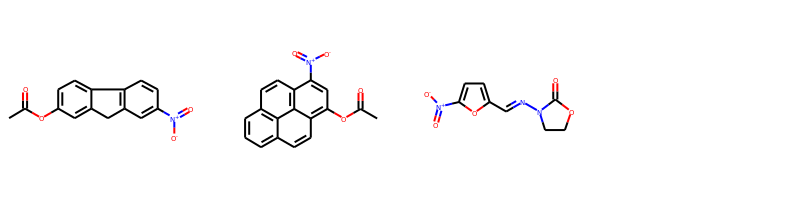

In [123]:
patt = Chem.MolFromSmiles('C(=O)O') # check if this substructure is inside the molecules
matches = list()
for molecule5 in suppl: # if substructure in molecules print these molecules
    if molecule5.HasSubstructMatch(patt):
        matches.append(molecule5)

Draw.MolsToGridImage(matches, molsPerRow=4)


Number of molecules with Iodine inside: 1


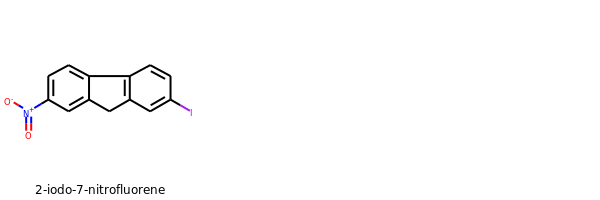

In [119]:
patt = Chem.MolFromSmiles('I')
matches = list()
count_I = 0
list_name_with_I = list()
for molecule6 in suppl: 
    if molecule6.HasSubstructMatch(patt):
        matches.append(molecule6)
        
        I_name = molecule6.GetProp('Compound Name')
        list_name_with_I.append(I_name)
        
        count_I += 1

print(f'Number of molecules with Iodine inside: {count_I}')
        
Draw.MolsToGridImage(matches, molsPerRow=3, legends=list_name_with_I)


Number of molecules with Bromine inside: 2


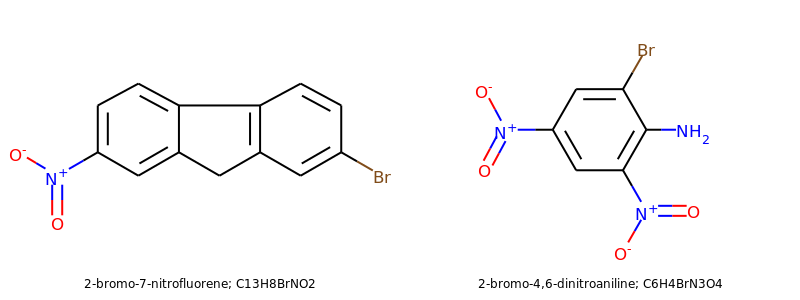

In [120]:
patt = Chem.MolFromSmiles('Br')
matches2 = list()
legend_list_Br = list()
count_Br = 0

for molecule7 in suppl: 
    if molecule7.HasSubstructMatch(patt):
        matches2.append(molecule7)
        
        Br_name = molecule7.GetProp('Compound Name') 
        Br_formula = molecule7.GetProp('Formula')
        
        legend_string = str(Br_name) + '; ' + str(Br_formula)
        legend_list_Br.append(legend_string)
        
        count_Br += 1

print(f'Number of molecules with Bromine inside: {count_Br}')
        
Draw.MolsToGridImage(matches2, molsPerRow=2, maxMols=len(suppl), subImgSize=(400, 300), legends = legend_list_Br)


Number of molecules with Chloride inside: 16


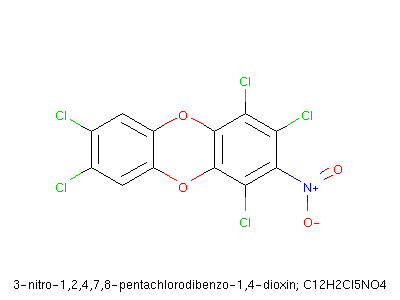

In [121]:
patt3 = Chem.MolFromSmiles('Cl')
matches3 = list()

count_Cl = 0
for molecule8 in suppl: 
    if molecule8.HasSubstructMatch(patt3):
        matches3.append(molecule8)
        count_Cl += 1

print(f'Number of molecules with Chloride inside: {count_Cl}')

index_list = []
for list_element_molecules in matches3:
    number_at =list_element_molecules.GetNumAtoms()
    index_list.append(number_at)
    
searched_value = max(index_list)
searched_index = index_list.index(searched_value)
searched_molecule = matches3[searched_index]

legend = searched_molecule.GetProp('Compound Name') + '; ' + searched_molecule.GetProp('Formula')
Draw.MolToImage(searched_molecule, legend = legend, size=(400, 300))
        